In [1]:
'''
*****************************************************************************************
*
*        		===============================================
*           		Nirikshak Bot (NB) Theme (eYRC 2020-21)
*        		===============================================
*
*  This script is to implement Task 1A - Part 1 of Nirikshak Bot (NB) Theme (eYRC 2020-21).
*  
*  This software is made available on an "AS IS WHERE IS BASIS".
*  Licensee/end user indemnifies and will keep e-Yantra indemnified from
*  any and all claim(s) that emanate from the use of the Software or 
*  breach of the terms of this agreement.
*  
*  e-Yantra - An MHRD project under National Mission on Education using ICT (NMEICT)
*
*****************************************************************************************
'''

# Team ID:			NB_2182
# Author List:		Yatharth Bhargava, Priyank Sisodia, Pranav Mittal
# Filename:			task_1a_part1.py
# Functions:		scan_image,getContours,getShape4,isEqual,isPerpendicular,isParallel
# 					[ Comma separated list of functions in this file ]
# Global variables:	shapes
# 					[ List of global variables defined in this file ]


####################### IMPORT MODULES #######################
## You are not allowed to make any changes in this section. ##
## You have to implement this task with the three available ##
## modules for this task (numpy, opencv, os)                ##
##############################################################
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
##############################################################



In [2]:
# Global variable for details of shapes found in image and will be put in this dictionary, returned from scan_image function
shapes = {}
#calibrate=np.load("calibrate.npy")
################# ADD UTILITY FUNCTIONS HERE #################
## You can define any utility functions for your code.      ##
## Please add proper comments to ensure that your code is   ##
## readable and easy to understand.                         ##
##############################################################
#------------------------------------------------------------------------------------------------------
#function to get contours
def getContours(imgColor):
    #makes countours in the image and tells the color
    global shapes
    imgHsv=cv2.cvtColor(imgColor,cv2.COLOR_BGR2HSV)
    
    #remove the maze from the image , we extract only the colored part of the image
    img=colorMask(imgHsv)
    
    contours, heirarchy =  cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    # print((contours))
    lst = list(list())
    for cnt in contours:
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True) #it gives the perimeter of each shape(true is for closed shape)
        approxCnt = cv2.approxPolyDP(cnt,0.01*perimeter,True) #this will give coridinates of all the corner points
        #using moments
        #contour on image--#img   #countour #index #color #thickness
        #print(img.shape[0]*img.shape[1]-100000)
        #print("Area =",area," Image Area=",0.50*img.shape[0]*img.shape[1])
        if area>500 and area<0.50*img.shape[0]*img.shape[1]: #to avoid the noise in the image, area>500 is applied
            #print("farea =",area) #print area
            #cv2.drawContours(imgColor,approxCnt,-1,(255,0,0),6)#index =-1 means all the countours
            
            # cv2.imshow("img",imgColor)
            # cv2.waitKey(0)
            # cv2.destroyAllWindows()

            #print("fCorners =",len(approxCnt)) #this will print number of corneres in each cotour

            n_corners = len(approxCnt)

            # print(n_corners) #corners will used to classify shapes
            
            #now we will draw a rounded box around the detected object(or shape)
            #x, y, w, h = cv2.boundingRect(approxCnt) #this function takes the corners cordinates of shape and returns the x,y,width,hight of the bounding box(x,y are top left corner cordinate)
            #cv2.rectangle(imgColor,(x,y),(x+w,y+h),(0,0,255),5) #draw a bounding rect with the corinates we got (x,y)=tope left,(x+w,y+h)=right bottom corner
            
            #=============================================================================================
            #for detection of shape
            #Circle/ Triangle/ Trapezium/ Rhombus/ Square/ Quadrilateral/ Parallelogram/ Pentagon/ Hexagon
            

            ##############################################################################################
            # As said by intructors on piazza the object shape will be spherical i.e. circular in 2D only
            # no other shapes, Therefore removing the conditions of all other shapes

            # IMPORTANT
            # Since we know now the object(ball) will definitely  spherical i.e circle in vision sensor image
            # we are removing the conditions for  other shapes

            ##############################################################################################

            #if n_corners>6:
            #    obj="Circle"
            #elif n_corners ==3:
            #    obj = "Triangle"    
            #elif n_corners ==5:
            #    obj = "Pentagon"
            #elif n_corners ==6:
            #    obj = "Hexagon"
            #elif n_corners ==4:
            #    obj=getShape4(approxCnt)

            obj = "Circle"             

            M = cv2.moments(approxCnt)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            #cX,cY=calibrateCentroid(cX,cY)
            # point = cv2.circle(img, (cX,cY), radius=2, color=255, thickness=3)
            # cv2.imshow("point",point)
            # cv2.waitKey(0)
            # cv2.destroyAllWindows()

            ##color detection
            h = imgHsv[cY,cX][0]

            if (h<=25 and h>=0 )or(h<=180 and h>=175) :
                color ="red"
            elif h<=70 and h>=35 :
                color ="green"
            elif h<=145 and h>=90 :
                color ="blue"
            else:
                color ="unknown"


            identifier = 0
            
            # identifier = -1
            # if obj=="Circle":
            #     identifier = 0
            # elif obj=="Triangle":
            #     identifier = 1 
            # elif obj=="Trapezium":
            #     identifier = 2
            # elif obj=="Rhombus":
            #     identifier = 3
            # elif obj=="Sqaure":
            #     identifier = 4
            # elif obj=="Quadrilateral":
            #     identifier = 5
            # elif obj=="Parallelogram":
            #     identifier = 6
            # elif obj=="Pentagon":
            #     identifier = 7
            # elif obj=="Hexagon":
            #     identifier = 8

            # Storing all information of a shape in a List 
            # and then will sort then according to the 
            # alphabetical order of ball Color

            lst.append( [ obj, color, area, cX, cY, identifier ])

    lst.sort(key = lambda lst: lst[1]) 
    # [ obj, color, area, cX, cY, identifier ]
    # #Circle/ Triangle/ Trapezium/ Rhombus/ Square/ Quadrilateral/ Parallelogram/ Pentagon/ Hexagon
    #plt.imshow(cv2.cvtColor(imgColor,cv2.COLOR_BGR2RGB))
    counter = np.zeros(9,int)

    for item in lst:
        counter[item[5]]+=1

    for item in lst:
        if counter[item[5]]==1:
            shapes[lst[0][0]]=([lst[0][1],lst[0][3],lst[0][4]])
        elif counter[item[5]]==0:
            continue
        elif counter[item[5]]>=1:
            if item[0] not in shapes:
                shapes[item[0]] = list(list())
            shapes[item[0]].extend([[item[1],item[3],item[4]]])

    return shapes



In [7]:
def colorMask(imgHsv):
    #if saturation value is small enough,changing hv give black and white part
    upr_hsv=(180,70,255)
    lwr_hsv=(0,0,0)
    mask=cv2.inRange(imgHsv,lwr_hsv,upr_hsv)#only colored circles are black
    mask=cv2.bitwise_not(mask,mask=None)
    #plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))
    return mask

In [4]:
def calibrateCentroid(cX,cY):
    #storing of sgnX is grater than or less that zero
    #1 implies greater than zero and vice versa
    sgnX=-1
    sgnY=-1
    eX=(cX-640)
    eY=(cY-640)
    if(eX<0):
        sgnX=1
    if(eY<0):
        sgnY=1
    #finding error in calibrate matrix
    for c in calibrate:
        #max gap between any two points is 66 ,we need to find the closest match
        if(abs(abs(eX)-c[0][0])<33)and(abs(abs(eY)-c[0][1])<33):
            cX=cX+sgnX*c[1][0]
            cY=cY+sgnY*c[1][1]
            #print("Match= ",c)
    #print(calibrate)
    #print("End Calibrate")
    
    return cX,cY

def getShape4(cnt):
    #print(cnt)
    #Trapezium/ Rhombus/ Square/ Quadrilateral/ Parallelogram
    obj = "Quadrilateral"
    v1=[cnt[0][0][0]-cnt[1][0][0],cnt[0][0][1]-cnt[1][0][1]]
    v2=[cnt[1][0][0]-cnt[2][0][0],cnt[1][0][1]-cnt[2][0][1]]
    v3=[cnt[2][0][0]-cnt[3][0][0],cnt[2][0][1]-cnt[3][0][1]]
    v4=[cnt[3][0][0]-cnt[0][0][0],cnt[3][0][1]-cnt[0][0][1]]
    eq1=isEqual(v1,v3)
    eq2=isEqual(v2,v4)
    eq3=isEqual(v1,v2)
    #print(v1,v2,v3,v4)
    #print(isParallel(v1,v3), isParallel(v2,v4))
    #checking for shapes having al least opposite sides equal
    if(eq1 and eq2) :
        obj="Parallelogram"
        #print(cnt)
        if(isPerpendicular(v1,v2)):
            
            obj="Rectangle"
        if(eq3):
            obj="Rhombus"
            if(isPerpendicular(v1,v2)):
                obj="Square"
    if(obj=="Quadrilateral"):
        #none of the above cases were true then check for trapezium
        if(isParallel(v1,v3) or isParallel(v2,v4)):
            obj="Trapezium"
    return obj
    
def isEqual(v1,v2):
    ratio=(v1[0]**2+v1[1]**2)/(v2[0]**2+v2[1]**2)
    #print("Equal ratio=",ratio)
    if ratio > 0.97 and ratio < 1.03:
        return True
    else:
        return False

def isPerpendicular(v1,v2):
    #print(v1,v2)
    #v2=complex(v2[0],v2[1])
    #v1=complex(v1[0],v1[0])
    #print(v1,v2)
    #angle=abs(np.angle(v2/v1,deg=True))
    #print("Perpendicular angle=",angle)
    #if(angle>85 and angle<95)or(angle<-85 and angle>-95) :
        #return True
    #checking for prouct of slopes
    #pro=((v2[1]/v2[0])*(v1[1]/v1[0]))
    #print("Perprndicular Product:",pro)
    #if pro<=-0.97 and pro >=-1.03:
        #return True
    #else:
        #return False
    #doing dot product of vectors
    dot=(v1[0]*v2[0]+v2[1]*v1[1])/((v1[0]**2+v1[1]**2)**(0.5)*(v2[0]**2+v2[1]**2)**(0.5))
    #print(dot)
    if dot < 0.03 and dot > -0.03:
        return True
    else:
        return False

def isParallel(v1,v2):
    ratio=(v2[1]/v2[0])/(v1[1]/v1[0])
    #print("Parallel ratio=",ratio)
    if ratio > 0.97 and ratio < 1.03:
        return True
    else:
        return False

##############################################################


{'Circle': [['blue', 824, 886], ['blue', 511, 511], ['blue', 783, 475], ['blue', 547, 231], ['green', 232, 790], ['green', 217, 221], ['green', 807, 220], ['red', 137, 885], ['red', 620, 772], ['red', 178, 456]]}


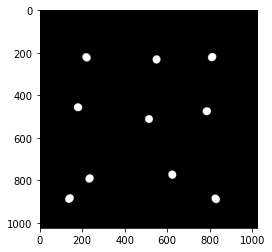

In [8]:
def scan_image(wraped_img):

    """
    Purpose:
    ---
    this function takes file path of an image as an argument and returns dictionary
    containing details of colored (non-white) shapes in that image

    Input Arguments:
    ---
    `img_file_path` :		[ str ]
        file path of image

    Returns:
    ---
    `shapes` :              [ dictionary ]
        details of colored (non-white) shapes present in image at img_file_path
        { 'Shape' : ['color', Area, cX, cY] }
    
    Example call:
    ---
    shapes = scan_image(img_file_path)
    """

    global shapes

    ##############	ADD YOUR CODE HERE	##############
    shapes={}

    #img = cv2.imread(img_file_path) // NO image file path required

    img=wraped_img # this time img is in RGB format
    #plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    #imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    #ret,thresh = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    shapes=getContours(img)
    #print(shapes)
    ##################################################
    
    return shapes

path=os.getcwd()+"/generated_images/ball.jpeg"
#path=os.getcwd()+"/generated_images/result_maze00.jpg"
#print(path)
shapes = scan_image(cv2.imread(path));



In [43]:
# NOTE:	YOU ARE NOT ALLOWED TO MAKE ANY CHANGE TO THIS FUNCTION
# 
# Function Name:    main
#        Inputs:    None
#       Outputs:    None
#       Purpose:    the function first takes 'Sample1.png' as input and runs scan_image function to find details
#                   of colored (non-white) shapes present in 'Sample1.png', it then asks the user whether
#                   to repeat the same on all images present in 'Samples' folder or not

if __name__ == '__main__':

    curr_dir_path = os.getcwd()
    print('Currently working in '+ curr_dir_path)

    # path directory of images in 'Samples' folder
    img_dir_path = curr_dir_path + '/Samples/'
    
    # path to 'Sample1.png' image file
    file_num = 1
    img_file_path = img_dir_path + 'Sample' + str(file_num) + '.png'

    print('\n============================================')
    print('\nLooking for Sample' + str(file_num) + '.png')

    if os.path.exists('Samples/Sample' + str(file_num) + '.png'):
        print('\nFound Sample' + str(file_num) + '.png')
    
    else:
        print('\n[ERROR] Sample' + str(file_num) + '.png not found. Make sure "Samples" folder has the selected file.')
        exit()
    
    print('\n============================================')

    try:
        print('\nRunning scan_image function with ' + img_file_path + ' as an argument')
        shapes = scan_image(img_file_path)

        if type(shapes) is dict:
            print(shapes)
            print('\nOutput generated. Please verify.')
        
        else:
            print('\n[ERROR] scan_image function returned a ' + str(type(shapes)) + ' instead of a dictionary.\n')
            exit()

    except Exception:
        print('\n[ERROR] scan_image function is throwing an error. Please debug scan_image function')
        exit()

    print('\n============================================')

    choice = input('\nWant to run your script on all the images in Samples folder ? ==>> "y" or "n": ')

    if choice == 'y':

        file_count = 2
        
        for file_num in range(file_count):

            # path to image file
            img_file_path = img_dir_path + 'Sample' + str(file_num + 1) + '.png'

            print('\n============================================')
            print('\nLooking for Sample' + str(file_num + 1) + '.png')

            if os.path.exists('Samples/Sample' + str(file_num + 1) + '.png'):
                print('\nFound Sample' + str(file_num + 1) + '.png')
            
            else:
                print('\n[ERROR] Sample' + str(file_num + 1) + '.png not found. Make sure "Samples" folder has the selected file.')
                exit()
            
            print('\n============================================')

            try:
                print('\nRunning scan_image function with ' + img_file_path + ' as an argument')
                shapes = scan_image(img_file_path)

                if type(shapes) is dict:
                    print(shapes)
                    print('\nOutput generated. Please verify.')
                
                else:
                    print('\n[ERROR] scan_image function returned a ' + str(type(shapes)) + ' instead of a dictionary.\n')
                    exit()

            except Exception:
                print('\n[ERROR] scan_image function is throwing an error. Please debug scan_image function')
                exit()

            print('\n============================================')

    else:
        print('')


Currently working in /home/captain/projects/eYantra/Task4/task4b/task_4b_develop_ball_navigation_algo_ubuntu


Looking for Sample1.png

[ERROR] Sample1.png not found. Make sure "Samples" folder has the selected file.


Running scan_image function with /home/captain/projects/eYantra/Task4/task4b/task_4b_develop_ball_navigation_algo_ubuntu/Samples/Sample1.png as an argument

[ERROR] scan_image function is throwing an error. Please debug scan_image function


Want to run your script on all the images in Samples folder ? ==>> "y" or "n": n

